In [100]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
#read input file
df = pd.read_csv('transactions_n100000.csv')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260741 entries, 0 to 260740
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ticket_id        260741 non-null  object 
 1   order_timestamp  260741 non-null  object 
 2   location         260741 non-null  int64  
 3   item_name        260741 non-null  object 
 4   item_count       260741 non-null  int64  
 5   lat              260741 non-null  float64
 6   long             260741 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ MB


In [104]:
df.head(10)

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234
5,0x598eb3,2019-09-18 11:59:00,5,fries,3,41.881818,-87.640234
6,0x5646c2,2019-09-21 12:40:00,3,salad,3,41.884490,-87.627059
7,0x5646c2,2019-09-21 12:40:00,3,fries,3,41.884490,-87.627059
8,0x4022cf,2019-09-21 12:25:00,4,salad,4,41.889047,-87.803605
9,0x4022cf,2019-09-21 12:25:00,4,fries,4,41.889047,-87.803605


In [105]:
df.describe()

,location,item_count,lat,long
count,260741.000000,260741.000000,260741.000000,260741.000000
mean,5.128123,2.446424,41.836145,-87.733627
std,2.557513,1.330490,0.144791,0.135937
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [106]:
#one ticket_id accounts for multiple item_name and item_count
df2 = df.copy(deep=True)
df2.drop(['item_name', 'item_count'], axis=1, inplace=True)
# df2.drop(, axis=1, inplace=True)

In [107]:
df2['item_burger'] = np.where(df['item_name']=='burger', df['item_count'], 0)
df2['item_fries'] = np.where(df['item_name']=='fries', df['item_count'], 0)
df2['item_salad'] = np.where(df['item_name']=='salad', df['item_count'], 0)
df2['item_shake'] = np.where(df['item_name']=='shake', df['item_count'], 0)

In [108]:
select_value = lambda x : list(x)[0]

In [109]:
agg_funcs = {'ticket_id' : select_value, 'order_timestamp' : select_value, 'location' : select_value, 'lat': select_value, 'long': select_value, 'item_burger': sum, 'item_fries': sum, 'item_salad': sum, 'item_shake': sum}

In [110]:
df2 = df2.groupby('ticket_id', as_index=False).agg(agg_funcs)

In [111]:
df2['order_timestamp'] = pd.to_datetime(df2['order_timestamp'])

In [112]:
df2

,ticket_id,order_timestamp,location,lat,long,item_burger,item_fries,item_salad,item_shake
0,0x100048,2019-03-29 12:24:00,1,41.880844,-87.630524,0,3,3,0
1,0x100057,2019-11-24 00:24:00,6,41.784576,-87.607565,1,1,0,0
2,0x1000ba,2019-02-09 12:02:00,5,41.881818,-87.640234,1,2,1,1
3,0x1000fb,2019-08-31 19:28:00,4,41.889047,-87.803605,4,5,1,4
4,0x10016e,2019-09-13 17:07:00,7,41.794132,-88.010140,3,3,0,3
...,...,...,...,...,...,...,...,...,...
99995,0xffddf,2019-05-27 18:07:00,4,41.889047,-87.803605,3,3,0,3
99996,0xffe25,2019-12-16 00:30:00,6,41.784576,-87.607565,2,2,0,0
99997,0xffec9,2019-07-04 13:30:00,1,41.880844,-87.630524,0,1,1,0
99998,0xffedb,2019-01-25 00:53:00,2,42.049306,-87.677606,1,1,0,0


In [113]:
import datetime as dt

In [114]:
df2['year'] = pd.DatetimeIndex(df2['order_timestamp']).year
df2['month'] = pd.DatetimeIndex(df2['order_timestamp']).month
df2['day'] = pd.DatetimeIndex(df2['order_timestamp']).day
df2['hour'] = pd.DatetimeIndex(df2['order_timestamp']).hour
df2['minute'] = pd.DatetimeIndex(df2['order_timestamp']).minute

In [115]:
df2

,ticket_id,order_timestamp,location,lat,long,item_burger,item_fries,item_salad,item_shake,year,month,day,hour,minute
0,0x100048,2019-03-29 12:24:00,1,41.880844,-87.630524,0,3,3,0,2019,3,29,12,24
1,0x100057,2019-11-24 00:24:00,6,41.784576,-87.607565,1,1,0,0,2019,11,24,0,24
2,0x1000ba,2019-02-09 12:02:00,5,41.881818,-87.640234,1,2,1,1,2019,2,9,12,2
3,0x1000fb,2019-08-31 19:28:00,4,41.889047,-87.803605,4,5,1,4,2019,8,31,19,28
4,0x10016e,2019-09-13 17:07:00,7,41.794132,-88.010140,3,3,0,3,2019,9,13,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0xffddf,2019-05-27 18:07:00,4,41.889047,-87.803605,3,3,0,3,2019,5,27,18,7
99996,0xffe25,2019-12-16 00:30:00,6,41.784576,-87.607565,2,2,0,0,2019,12,16,0,30
99997,0xffec9,2019-07-04 13:30:00,1,41.880844,-87.630524,0,1,1,0,2019,7,4,13,30
99998,0xffedb,2019-01-25 00:53:00,2,42.049306,-87.677606,1,1,0,0,2019,1,25,0,53


In [116]:
df2['year'].value_counts()

2019    100000
Name: year, dtype: int64

In [117]:
df2.drop('year', axis=1, inplace=True)

In [118]:
df2

,ticket_id,order_timestamp,location,lat,long,item_burger,item_fries,item_salad,item_shake,month,day,hour,minute
0,0x100048,2019-03-29 12:24:00,1,41.880844,-87.630524,0,3,3,0,3,29,12,24
1,0x100057,2019-11-24 00:24:00,6,41.784576,-87.607565,1,1,0,0,11,24,0,24
2,0x1000ba,2019-02-09 12:02:00,5,41.881818,-87.640234,1,2,1,1,2,9,12,2
3,0x1000fb,2019-08-31 19:28:00,4,41.889047,-87.803605,4,5,1,4,8,31,19,28
4,0x10016e,2019-09-13 17:07:00,7,41.794132,-88.010140,3,3,0,3,9,13,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0xffddf,2019-05-27 18:07:00,4,41.889047,-87.803605,3,3,0,3,5,27,18,7
99996,0xffe25,2019-12-16 00:30:00,6,41.784576,-87.607565,2,2,0,0,12,16,0,30
99997,0xffec9,2019-07-04 13:30:00,1,41.880844,-87.630524,0,1,1,0,7,4,13,30
99998,0xffedb,2019-01-25 00:53:00,2,42.049306,-87.677606,1,1,0,0,1,25,0,53


In [119]:
dummy = pd.get_dummies(df2['location'], prefix='location')

In [120]:
df2 = df2.join(dummy)

In [121]:
df2.drop('order_timestamp', axis=1, inplace=True)
df2

,ticket_id,location,lat,long,item_burger,item_fries,item_salad,item_shake,month,day,...,minute,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9
0,0x100048,1,41.880844,-87.630524,0,3,3,0,3,29,...,24,1,0,0,0,0,0,0,0,0
1,0x100057,6,41.784576,-87.607565,1,1,0,0,11,24,...,24,0,0,0,0,0,1,0,0,0
2,0x1000ba,5,41.881818,-87.640234,1,2,1,1,2,9,...,2,0,0,0,0,1,0,0,0,0
3,0x1000fb,4,41.889047,-87.803605,4,5,1,4,8,31,...,28,0,0,0,1,0,0,0,0,0
4,0x10016e,7,41.794132,-88.010140,3,3,0,3,9,13,...,7,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0xffddf,4,41.889047,-87.803605,3,3,0,3,5,27,...,7,0,0,0,1,0,0,0,0,0
99996,0xffe25,6,41.784576,-87.607565,2,2,0,0,12,16,...,30,0,0,0,0,0,1,0,0,0
99997,0xffec9,1,41.880844,-87.630524,0,1,1,0,7,4,...,30,1,0,0,0,0,0,0,0,0
99998,0xffedb,2,42.049306,-87.677606,1,1,0,0,1,25,...,53,0,1,0,0,0,0,0,0,0


In [122]:
df2['total_count'] = df2[['item_burger', 'item_fries', 'item_salad', 'item_shake']].sum(axis=1)
# df.iloc[:, -4:-1].sum(axis=1)
df2

,ticket_id,location,lat,long,item_burger,item_fries,item_salad,item_shake,month,day,...,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,total_count
0,0x100048,1,41.880844,-87.630524,0,3,3,0,3,29,...,1,0,0,0,0,0,0,0,0,6
1,0x100057,6,41.784576,-87.607565,1,1,0,0,11,24,...,0,0,0,0,0,1,0,0,0,2
2,0x1000ba,5,41.881818,-87.640234,1,2,1,1,2,9,...,0,0,0,0,1,0,0,0,0,5
3,0x1000fb,4,41.889047,-87.803605,4,5,1,4,8,31,...,0,0,0,1,0,0,0,0,0,14
4,0x10016e,7,41.794132,-88.010140,3,3,0,3,9,13,...,0,0,0,0,0,0,1,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0xffddf,4,41.889047,-87.803605,3,3,0,3,5,27,...,0,0,0,1,0,0,0,0,0,9
99996,0xffe25,6,41.784576,-87.607565,2,2,0,0,12,16,...,0,0,0,0,0,1,0,0,0,4
99997,0xffec9,1,41.880844,-87.630524,0,1,1,0,7,4,...,1,0,0,0,0,0,0,0,0,2
99998,0xffedb,2,42.049306,-87.677606,1,1,0,0,1,25,...,0,1,0,0,0,0,0,0,0,2


In [123]:
df2.columns

Index(['ticket_id', 'location', 'lat', 'long', 'item_burger', 'item_fries',
       'item_salad', 'item_shake', 'month', 'day', 'hour', 'minute',
       'location_1', 'location_2', 'location_3', 'location_4', 'location_5',
       'location_6', 'location_7', 'location_8', 'location_9', 'total_count'],
      dtype='object')

In [97]:
#number of clusters = 3
#fitted using all 17 variables in df2
'''
Comprehensive clustering but hard to distinguish significant differences across clusters.
So 
'''
kmeans = KMeans(n_clusters=3, random_state=9).fit(df2)

In [98]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 4.99465146e+00  4.18450292e+01 -8.77200194e+01  1.84069620e+00
   2.56854112e+00  7.27844922e-01  1.22602760e+00  6.49847818e+00
   1.56657900e+01  1.06526994e+01  9.48934724e+00  8.85316628e-02
   1.55757809e-01  8.86498626e-02  1.10960078e-01  8.44537691e-02
   1.55610059e-01  1.11551077e-01  9.23436069e-02  1.12142076e-01
   6.36310984e+00]
 [ 5.02879947e+00  4.18421403e+01 -8.77250298e+01  1.90267662e+00
   2.59878004e+00  6.96103423e-01  1.29658291e+00  6.51902768e+00
   1.56524642e+01  1.28361860e+01  4.93334244e+01  8.41223598e-02
   1.55134741e-01  8.61859675e-02  1.18627094e-01  8.06931294e-02
   1.53101481e-01  1.17018694e-01  8.59128429e-02  1.19203690e-01
   6.49414300e+00]
 [ 4.97163249e+00  4.18464194e+01 -8.77188039e+01  1.83268588e+00
   2.53892252e+00  7.06236637e-01  1.20257777e+00  6.51130786e+00
   1.57263228e+01  1.07290029e+01  2.94612281e+01  8.77525823e-02
   1.62254946e-01  8.58553919e-02  1.10639323e-01  8.40184298e-02
   1.59484446e-01  1.08591562e-01  9.0

In [61]:
#number of clusters = 3
#fitted using df2['day', 'hour', 'minute']
kmeans_time = KMeans(n_clusters=3, random_state=9).fit(df2[['month','day', 'hour', 'minute']])
centroids_time = kmeans_time.cluster_centers_
print(centroids_time)

[[ 6.49847818 15.66579002 10.65269939  9.48934724]
 [ 6.51095989 15.72811032 10.72976635 29.4626641 ]
 [ 6.51937961 15.65065105 12.83573618 49.33499256]]


In [29]:
df2.to_csv('kmeans_preprocessed_df.csv')

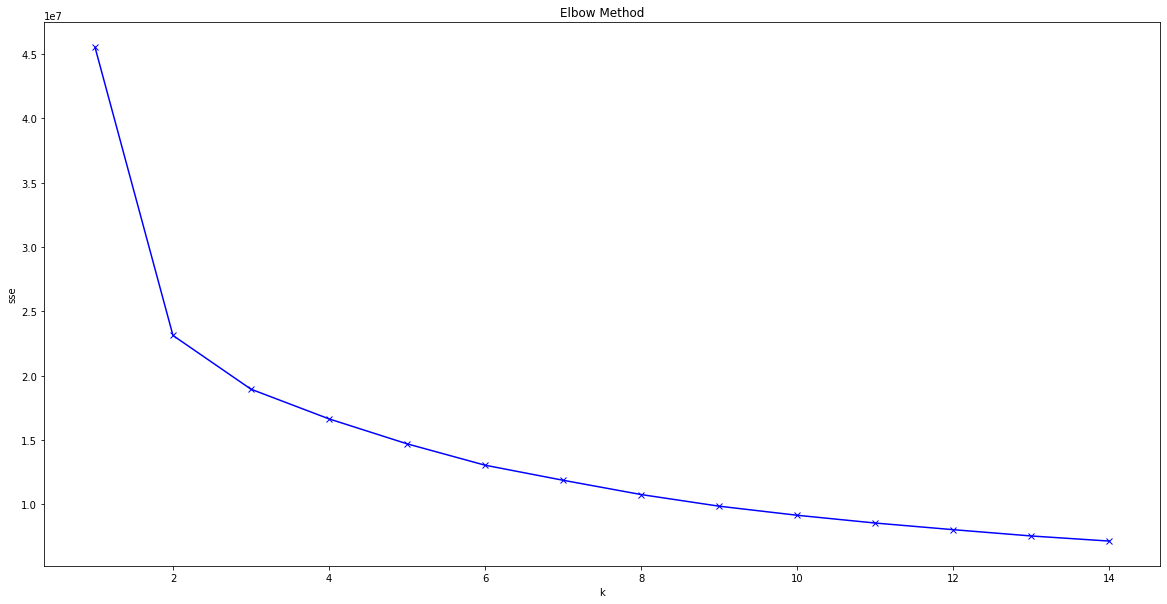

In [30]:
sse = []
for k in range(1,15):
    km = KMeans(n_clusters = k)
    km = km.fit(df2)
    sse.append(km.inertia_)
plt.figure(figsize = (20, 10))
plt.plot(range(1,15), sse, 'bx-')
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Elbow Method')
plt.show()

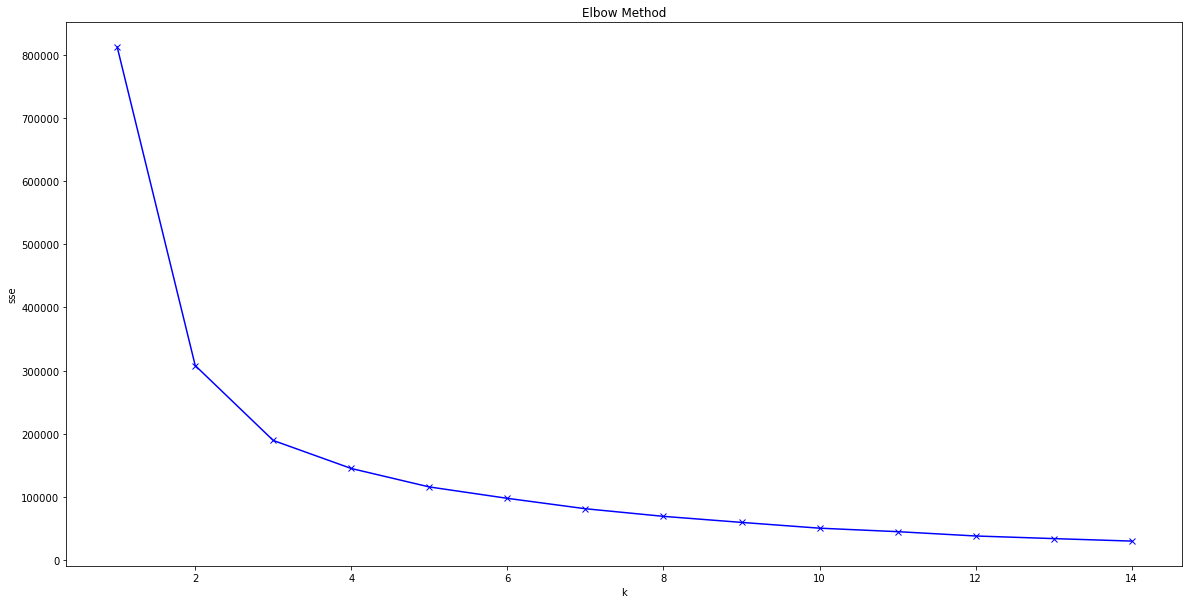

In [31]:
#item elbow
sse = []
for k in range(1,15):
    km = KMeans(n_clusters = k)
    km = km.fit(df2[['item_burger', 'item_fries', 'item_salad', 'item_shake']])
    sse.append(km.inertia_)
plt.figure(figsize = (20, 10))
plt.plot(range(1,15), sse, 'bx-')
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Elbow Method')
plt.show()

In [32]:
#number of clusters = 3
#fitted using df2['item_burger', 'item_fries', 'item_salad', 'item_shake']
kmeans_item = KMeans(n_clusters=3, random_state=9).fit(df2[['item_burger', 'item_fries', 'item_salad', 'item_shake']])
centroids_item = kmeans_item.cluster_centers_
print(centroids_item)

[[3.93799921 4.08471913 0.14671992 3.36778185]
 [1.21417669 1.49333496 0.27915827 0.38647048]
 [0.28978587 2.88993355 2.60014767 0.11223234]]


In [127]:
#number of clusters = 3
#fitted using df2['item_burger', 'item_fries', 'item_salad', 'item_shake']
kmeans_item2 = KMeans(n_clusters=3, random_state=9).fit(df2[['item_burger', 'item_fries', 'item_salad', 'item_shake', 'total_count']])
centroids_item2 = kmeans_item2.cluster_centers_
print(centroids_item2)

[[ 0.90509481  1.43994981  0.534855    0.19735899  3.0772586 ]
 [ 3.94824868  4.12632806  0.17807937  3.4762835  11.72893961]
 [ 1.22251868  3.11302998  1.8905113   0.62137382  6.84743378]]


In [133]:
# hour of the day
#number of clusters = 3
#fitted using df2['item_burger', 'item_fries', 'item_salad', 'item_shake']
kmeans_hr = KMeans(n_clusters=3, random_state=9).fit(df2[['item_shake', 'hour']])
centroids_hr = kmeans_hr.cluster_centers_
print(centroids_hr)

[[ 2.80443996 18.73854692]
 [ 0.32537408  0.19215395]
 [ 0.11788352 12.20049235]]


In [60]:
#number of clusters = 3
#fitted using df2['day', 'hour', 'minute']
kmeans_loc = KMeans(n_clusters=3, random_state=9).fit(df2[['location']])
centroids_loc = kmeans_loc.cluster_centers_
print(centroids_loc)

[[5.12109951]
 [8.00531578]
 [2.00027154]]


In [72]:
#number of clusters = 3
#fitted using df2['day', 'hour', 'minute']
kmeans_loc2 = KMeans(n_clusters=3, random_state=9).fit(df2[['location', 'total_count']])
centroids_loc2 = kmeans_loc2.cluster_centers_
print(centroids_loc2)

[[ 6.02794542 11.33460178]
 [ 2.20705853  3.9361518 ]
 [ 6.63573004  3.80105867]]


In [125]:
#number of clusters = 3
#fitted using df2['day', 'hour', 'minute']
kmeans_ct = KMeans(n_clusters=3, random_state=9).fit(df2[['total_count']])
centroids_ct = kmeans_ct.cluster_centers_
print(centroids_ct)

[[ 6.76504317]
 [ 2.86228659]
 [12.22780137]]


In [73]:
df2['cluster'] = kmeans.fit_predict(df2[['location', 'total_count']])
cen_x = [i[0] for i in centroids_loc2] 
cen_y = [i[1] for i in centroids_loc2]

In [74]:
df2['cen_x'] = df2.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df2['cen_y'] = df2.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

In [76]:
colors = ['#DF2020', '#81DF20', '#2095DF']
df2['c'] = df2.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

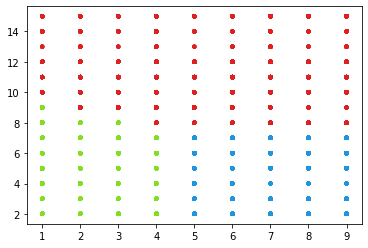

In [78]:
plt.scatter(df2.location, df2.total_count, c=df2.c, alpha = 0.6, s=10)

In [79]:
df2.groupby(by=["location"]).sum()

,item_burger,item_fries,item_salad,item_shake,month,day,hour,minute,location_1,location_2,...,location_4,location_5,location_6,location_7,location_8,location_9,total_count,cluster,cen_x,cen_y
location,,,,,,,,,,,,,,,,,,,,,
1,7638,20493,12855,4418,56613,135456,104109,251587,8682.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45404,7623,23208.001391,42008.628467
2,27654,30944,3290,7920,102878,244945,86014,462663,0.0,15771.0,...,0.0,0.0,0.0,0.0,0.0,0.0,69808,13857,42120.697616,76237.683319
3,7547,20414,12867,4428,56009,135737,104608,252260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45256,7433,23988.221408,43516.345379
4,33611,37834,4223,30186,73402,179208,181920,335554,0.0,0.0,...,11338.0,0.0,0.0,0.0,0.0,0.0,105854,3445,55181.889823,103024.054789
5,6868,19737,12869,4274,54039,129958,103101,240190,0.0,0.0,...,0.0,8307.0,0.0,0.0,0.0,0.0,43748,13372,54137.790567,43787.267735
6,27478,30732,3254,7797,102083,247087,85866,458062,0.0,0.0,...,0.0,0.0,15607.0,0.0,0.0,0.0,69261,26458,102118.526897,77237.888145
7,33022,37375,4353,29679,73638,174875,180766,329820,0.0,0.0,...,0.0,0.0,0.0,11237.0,0.0,0.0,104429,6944,69846.250863,101210.458499
8,8587,21681,13094,5397,57692,139557,109303,258371,0.0,0.0,...,0.0,0.0,0.0,0.0,8962.0,0.0,48759,14044,58290.310448,48680.161415
9,33441,37657,4216,30050,74597,181327,184067,336576,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11405.0,105364,7192,70934.310986,102180.512252


In [137]:
df2.groupby(by=["total_count"])['ticket_id'].count()

total_count
2     23259
3      4860
4     17040
5      5049
6     12587
7      2174
8      3957
9      5881
10     2840
11     5437
12    10182
13      547
14     2252
15     3935
Name: ticket_id, dtype: int64

In [124]:
df2.groupby(by=['location'])['ticket_id'].count()

location
1     8682
2    15771
3     8691
4    11338
5     8307
6    15607
7    11237
8     8962
9    11405
Name: ticket_id, dtype: int64